In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from scipy.signal import welch, butter, filtfilt
from scipy.signal import detrend
from scipy.signal import spectrogram, get_window
from scipy.stats import zscore
from scipy.integrate import simpson



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction'):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))
#         print("")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns

#these csv files, i want to show the graphs 
#10e83d6550.csv
#3e9a43491a.csv only turns 
#6670936848.csv 


#function to see the occurance of events over time 
def plot_event_occurrences(time, events, event_names, dataframe): 
    event_cols = ['StartHesitation','Turn','Walking']
    print(dataframe[event_cols].sum())

    plt.figure(figsize=(12,4))
    for col in event_cols:
        plt.plot(dataframe['time_seconds'], dataframe[col], label=col)
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Event Indicator')
    plt.title('FOG Events Over Time')
    plt.show()



In [121]:
dataset_1 = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/10e83d6550.csv"
dataset_2 = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/3e9a43491a.csv"
dataset_3 = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/6670936848.csv"
df = pd.read_csv(dataset_1)
df2 = pd.read_csv(dataset_2)
df3 = pd.read_csv(dataset_3)

In [122]:
#calculate magnitude of acceleration
def calculate_magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

In [123]:
#convert timestep to seconds, new column 
hertz = 128  
df['time_seconds'] = df['Time'] / hertz
df2['time_seconds'] = df2['Time'] / hertz
df3['time_seconds'] = df3['Time'] / hertz

#calculate magnitude and add as new column
df['Magnitude'] = calculate_magnitude(df['AccV'], df['AccML'], df['AccAP'])
df2['Magnitude'] = calculate_magnitude(df2['AccV'], df2['AccML'], df2['AccAP'])
df3['Magnitude'] = calculate_magnitude(df3['AccV'], df3['AccML'], df3['AccAP'])

print(df.head())
#print(df['time_seconds'].max())
print(df2.head())
print(df3.head())
df.head(25)

   Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  \
0     0 -9.687117 -1.238445 -1.932528                0     0        0   
1     1 -9.686484 -1.233967 -1.932522                0     0        0   
2     2 -9.683087 -1.236049 -1.936234                0     0        0   
3     3 -9.684048 -1.240766 -1.937733                0     0        0   
4     4 -9.683254 -1.239990 -1.942938                0     0        0   

   time_seconds  Magnitude  
0      0.000000   9.955332  
1      0.007812   9.954160  
2      0.015625   9.951834  
3      0.023438   9.953648  
4      0.031250   9.953793  
   Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  \
0     0 -9.505363  0.675182 -1.361107                0     0        0   
1     1 -9.509803  0.677602 -1.363267                0     0        0   
2     2 -9.496094  0.686661 -1.362991                0     0        0   
3     3 -9.491545  0.684340 -1.362992                0     0        0   
4     4 -9.493475  0.6

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,time_seconds,Magnitude
0,0,-9.687117,-1.238445,-1.932528,0,0,0,0.000000,9.955332
1,1,-9.686484,-1.233967,-1.932522,0,0,0,0.007812,9.954160
2,2,-9.683087,-1.236049,-1.936234,0,0,0,0.015625,9.951834
3,3,-9.684048,-1.240766,-1.937733,0,0,0,0.023438,9.953648
4,4,-9.683254,-1.239990,-1.942938,0,0,0,0.031250,9.953793
5,5,-9.684829,-1.240005,-1.942941,0,0,0,0.039062,9.955327
6,6,-9.684668,-1.239889,-1.944427,0,0,0,0.046875,9.955446
7,7,-9.685746,-1.240870,-1.946666,0,0,0,0.054688,9.957054
8,8,-9.685559,-1.245318,-1.943694,0,0,0,0.062500,9.956848
9,9,-9.683263,-1.243052,-1.945175,0,0,0,0.070312,9.954621


In [124]:
#plot acceleration, accelerometer data, time should be in seconds 
def plot_acceleration_data(time, x, y, z, dataframe):
    plt.figure(figsize=(12, 6))
    plt.plot(time, x, label='AccV (Vertical)', color='r', linewidth = 0.5)
    plt.plot(time, y, label='AccML (Medio-Lateral)', color='g', linewidth = 0.5)
    plt.plot(time, z, label='AccAP (Antero-Posterior)', color='b', linewidth = 0.5)

    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.title('Acceleration over Time')

    #show event occurances on the same plot, but as highlighted sections
    event_cols = ['StartHesitation', 'Turn', 'Walking']
    colors = {'StartHesitation':'red', 'Turn':'green', 'Walking':'blue'}
    
    for col in event_cols:
        if col in dataframe.columns:
            in_event = False
            start_time = None
            first_span = True
            for t, val in zip(time, dataframe[col]):
                if val == 1 and not in_event:
                    in_event = True
                    start_time = t
                elif val == 0 and in_event:
                    in_event = False
                    plt.axvspan(start_time, t, color=colors[col], alpha=0.1,
                                label=col if first_span else "")
                    first_span = False
            # If event lasts until the end
            if in_event:
                plt.axvspan(start_time, time.iloc[-1], color=colors[col], alpha=0.1,
                            label=col if first_span else "")
 
    plt.legend()
    plt.xlim(0,20)
    plt.show()

In [125]:
# def main():
#     #histograms
#     plt.figure(figsize=(12,4))
#     sns.histplot(df['AccV'], bins=50, kde=True, color='r', label='AccV', alpha=0.5)
#     sns.histplot(df['AccML'], bins=50, kde=True, color='g', label='AccML', alpha=0.5)
#     sns.histplot(df['AccAP'], bins=50, kde=True, color='b', label='AccAP', alpha=0.5)
#     plt.legend()
#     plt.title("Acceleration Distributions")
#     plt.show()

#     #acceleration plot function
#     plot_acceleration_data(df['time_seconds'], df['AccV'], df['AccML'], df['AccAP'], df)
#     plot_acceleration_data(df2['time_seconds'], df2['AccV'], df2['AccML'], df2['AccAP'], df2)
#     plot_acceleration_data(df3['time_seconds'], df3['AccV'], df3['AccML'], df3['AccAP'], df3)

# if __name__ == "__main__":
#     main()

In [126]:
"""
Computes and plots the combined fast Fourier Transform of all accelerometer axes,
highlights outlier frequencies based on IQR --> < or > 1.5 * IQR is an outlier

Parameters: dataframe, the sampling freq in Hz (default = 128)
"""
def plot_combined_fft(df, fs=128):
    # Combine accelerometer axes into one signal (magnitude)
    combined_signal = np.sqrt(df['AccV']**2 + df['AccML']**2 + df['AccAP']**2)
    
    # Remove DC offset
    combined_signal -= np.mean(combined_signal)
    
    # Compute FFT
    N = len(combined_signal)
    fft_values = np.fft.fft(combined_signal)
    fft_freq = np.fft.fftfreq(N, 1/fs)

    # Use only positive frequencies
    mask = fft_freq >= 0
    fft_freq = fft_freq[mask]
    fft_magnitude = np.abs(fft_values[mask]) / N

    #computer IQR
    Q1 = np.percentile(fft_magnitude, 25)
    Q3 = np.percentile(fft_magnitude, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = np.where((fft_magnitude < lower_bound) | (fft_magnitude > upper_bound))[0]
    outlier_freqs = fft_freq[outlier_indices]
    outlier_mags = fft_magnitude[outlier_indices]
    #identify outliers

    # Plot FFT with outliers highlighted
    plt.figure(figsize=(10, 4))
    plt.plot(fft_freq, fft_magnitude, label='FFT Magnitude')
    plt.scatter(outlier_freqs, outlier_mags, color='red', label='Outliers', zorder=2)
    plt.title("Fourier Transform (FFT) with IQR Outlier Detection")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    

In [127]:
# plot_combined_fft(df, fs=128)
# plot_combined_fft(df2, fs=128)
# plot_combined_fft(df3, fs=128)

# Spectrogram 
### We can see the fog events, but the parameters need to be fixed

In [128]:
"""
compute and plot spectrogram of combined accelerometer signal, 
highlight time-frequency bins that are statistical outliers (IQR)

Parameters: dataframe, fs, nperseg (length of each segment for FFT default = 256)
"""
def plot_spectrogram(df, fs=128, nperseg=512):
    # Combine axes into one magnitude signal
    combined_signal = np.sqrt(df['AccV']**2 + df['AccML']**2 + df['AccAP']**2)
    combined_signal -= np.mean(combined_signal)  # remove DC offset

    # Compute spectrogram
    f, t, Sxx = spectrogram(combined_signal, fs=fs, nperseg=nperseg)
    Sxx_log = 10 * np.log10(Sxx + 1e-12)  # convert to dB for better visibility

    # Plot spectrogram
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(t, f, Sxx_log, shading='gouraud', cmap='viridis')
    plt.colorbar(label='Power (dB)')
    plt.title("Spectrogram (no outlier detection)")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

    # Highlight FOG events
    event_cols = ['StartHesitation', 'Turn', 'Walking']
    colors = {'StartHesitation':'red', 'Turn':'green', 'Walking':'blue'}
    fog_mask = np.zeros(len(df), dtype=bool)
    
    for col in event_cols:
        if col in df.columns:
            in_event = False
            start_time = None
            first_span = True
            for t_idx, val in zip(df.index / fs, df[col]):
                if val == 1 and not in_event:
                    in_event = True
                    start_time = t_idx
                elif val == 0 and in_event:
                    in_event = False
                    plt.axvspan(start_time, t_idx, color=colors[col], alpha=0.2,
                                label=col if first_span else "")
                    first_span = False
             # Build mask for stats
            fog_mask |= (df[col] == 1)
            if in_event:
                plt.axvspan(start_time, df.index[-1] / fs, color=colors[col], alpha=0.2,
                            label=col if first_span else "")

    

    plt.legend()
    plt.xlim(0, 80)  # Optional: focus on first 20
    plt.ylim(0,25)
    plt.show()

    # ===== Compute statistics before, during, and after FOG =====
    fog_indices = np.where(fog_mask)[0]
    if len(fog_indices) > 0:
        fog_start = fog_indices[0]
        fog_end = fog_indices[-1]

        before = combined_signal[:fog_start]
        during = combined_signal[fog_start:fog_end]
        after = combined_signal[fog_end:]

        def compute_stats(segment):
            return {
                "mean": np.mean(segment),
                "std": np.std(segment),
                "rms": np.sqrt(np.mean(segment**2)),
                "energy": np.sum(segment**2)
            }

        stats_before = compute_stats(before)
        stats_during = compute_stats(during)
        stats_after = compute_stats(after)

        print("\nSignal Statistics:")
        print(f"Before FOG  (0 - {fog_start/fs:.2f}s): {stats_before}")
        print(f"During FOG  ({fog_start/fs:.2f}s - {fog_end/fs:.2f}s): {stats_during}")
        print(f"After FOG   ({fog_end/fs:.2f}s - {len(df)/fs:.2f}s): {stats_after}")

In [129]:
# plot_spectrogram(df)
# plot_spectrogram(df2)
# plot_spectrogram(df3)

# Feature engineering: Energy
### Here we added more features on energy and frequencies

In [130]:
def accel_magnitude(df):
    return np.sqrt(df['AccV']**2 + df['AccML']**2 + df['AccAP']**2)

def butter_lowpass_filter(signal, cutoff=15, fs=128, order=2):
    nyquist = 0.5 * fs
    norm_cutoff = cutoff / nyquist
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    filtered = filtfilt(b, a, signal)
    return filtered

In [131]:
def compute_fft_window_energy(
    df, 
    fs=128, 
    window_sec=3.0, 
    overlap=0.5,
    fog_fraction_threshold=0.5,
    freq_limit=15
):
    """
    Computes FFT energy features for each window:
        - Magnitude FFT energies
        - Individual axis FFT energies (AccV, AccML, AccAP)
        - One-hot FoG labels
        - Binary label: FoG vs NonFoG
        - Raw acceleration statistics per window
    """

    # 1. Magnitude signal
    x_mag = accel_magnitude(df)
    x_mag = butter_lowpass_filter(x_mag, cutoff=15, fs=fs)
    x_mag = x_mag - np.mean(x_mag)

    # 1b. Individual axes
    axes = {
        "V":  df["AccV"].to_numpy(),
        "ML": df["AccML"].to_numpy(),
        "AP": df["AccAP"].to_numpy(),
    }

    for k in axes:
        axes[k] = butter_lowpass_filter(axes[k], cutoff=15, fs=fs)
        axes[k] = axes[k] - np.mean(axes[k])

    # 2. Raw FoG events
    fog_cols = [c for c in ["StartHesitation", "Turn", "Walking"] if c in df.columns]
    fog_matrix = df[fog_cols].to_numpy()

    # 3. Windowing
    win = int(window_sec * fs)
    hop = int(win * (1 - overlap))
    N = len(x_mag)

    rows = []

    # 4. Loop through windows
    for s in range(0, N - win, hop):
        e = s + win

        # ---- CLASSIFICATION ----
        window_events = fog_matrix[s:e].mean(axis=0)
        max_idx = np.argmax(window_events)
        max_val = window_events[max_idx]

        if max_val >= fog_fraction_threshold:
            active_event = fog_cols[max_idx]
        else:
            active_event = None

        onehot = {
            "StartHesitation_onehot": 1 if active_event == "StartHesitation" else 0,
            "Turn_onehot":            1 if active_event == "Turn" else 0,
            "Walking_onehot":         1 if active_event == "Walking" else 0,
        }

        binary_label = "FoG" if any(onehot.values()) else "NonFoG"

        # ---- FFT ENERGY FUNCTION ----
        def compute_energy(signal):
            seg = signal[s:e]
            seg = seg - np.mean(seg)

            freqs = np.fft.rfftfreq(len(seg), d=1/fs)
            mag   = np.abs(np.fft.rfft(seg)) / len(seg)

            mask = freqs <= freq_limit
            freqs = freqs[mask]
            mag   = mag[mask]

            low_mask  = (freqs >= 0.5) & (freqs <= 3)
            high_mask = (freqs > 3)    & (freqs <= 8)

            low  = simpson(mag[low_mask], freqs[low_mask]) if low_mask.sum() > 1 else 0
            high = simpson(mag[high_mask], freqs[high_mask]) if high_mask.sum() > 1 else 0
            total = simpson(mag, freqs)

            return low, high, total

        # ---- FFT energies ----
        low_mag, high_mag, total_mag = compute_energy(x_mag)
        V_low, V_high, V_total       = compute_energy(axes["V"])
        ML_low, ML_high, ML_total    = compute_energy(axes["ML"])
        AP_low, AP_high, AP_total    = compute_energy(axes["AP"])

        energy_ratio = high_mag / low_mag if low_mag > 0 else np.nan
        freeze_index = (high_mag**2) / (low_mag**2) if low_mag > 0 else np.nan

        # -------------------------
        # FINAL ROW (FFT FEATURES)
        # -------------------------
        row = {
            "start_time": s / fs,
            "end_time": e / fs,
            "label_fog": binary_label,

            "low_energy": low_mag,
            "high_energy": high_mag,
            "total_energy": total_mag,
            "energy_ratio": energy_ratio,
            "freeze_index": freeze_index,

            "V_low_energy": V_low,
            "V_high_energy": V_high,
            "V_total_energy": V_total,

            "ML_low_energy": ML_low,
            "ML_high_energy": ML_high,
            "ML_total_energy": ML_total,

            "AP_low_energy": AP_low,
            "AP_high_energy": AP_high,
            "AP_total_energy": AP_total,
        }

        row.update(onehot)

        # -------------------------
        # RAW SENSOR WINDOW STATS
        # -------------------------
        raw_window = df.iloc[s:e]

        row.update({
            "mean_AccV": raw_window["AccV"].mean(),
            "std_AccV":  raw_window["AccV"].std(),
            "min_AccV":  raw_window["AccV"].min(),
            "max_AccV":  raw_window["AccV"].max(),

            "mean_AccML": raw_window["AccML"].mean(),
            "std_AccML":  raw_window["AccML"].std(),
            "min_AccML":  raw_window["AccML"].min(),
            "max_AccML":  raw_window["AccML"].max(),

            "mean_AccAP": raw_window["AccAP"].mean(),
            "std_AccAP":  raw_window["AccAP"].std(),
            "min_AccAP":  raw_window["AccAP"].min(),
            "max_AccAP":  raw_window["AccAP"].max(),
        })

        raw_mag = np.sqrt(
            raw_window["AccV"]**2 +
            raw_window["AccML"]**2 +
            raw_window["AccAP"]**2
        )

        row.update({
            "mean_magnitude": raw_mag.mean(),
            "std_magnitude":  raw_mag.std(),
            "min_magnitude":  raw_mag.min(),
            "max_magnitude":  raw_mag.max(),
        })

        rows.append(row)

    return pd.DataFrame(rows)


In [132]:
energy_df = compute_fft_window_energy(df)
energy_df2 = compute_fft_window_energy(df2)
energy_df3 = compute_fft_window_energy(df3)
energy_df.head(10)

,start_time,end_time,label_fog,low_energy,high_energy,total_energy,energy_ratio,freeze_index,V_low_energy,V_high_energy,...,min_AccML,max_AccML,mean_AccAP,std_AccAP,min_AccAP,max_AccAP,mean_magnitude,std_magnitude,min_magnitude,max_magnitude
0,0.0,3.0,NonFoG,0.000379,0.000747,0.001988,1.974049,3.896870,0.000406,0.000583,...,-1.250471,-1.232311,-1.937727,0.007634,-1.957827,-1.910961,9.955168,0.002200,9.949570,9.962331
1,1.5,4.5,NonFoG,0.000519,0.000731,0.002026,1.408387,1.983554,0.000283,0.000708,...,-1.249907,-1.234556,-1.932947,0.007868,-1.957823,-1.910950,9.954723,0.002347,9.948191,9.962331
2,3.0,6.0,NonFoG,0.127866,0.122340,0.394465,0.956785,0.915437,0.147544,0.144451,...,-2.789597,-0.043426,-1.611461,1.252217,-3.180020,5.061886,10.079961,0.381178,9.781830,12.640215
3,4.5,7.5,NonFoG,0.544862,0.525531,1.341111,0.964521,0.930300,0.637625,0.485832,...,-2.789597,0.488646,2.118071,3.689194,-3.180020,7.613957,9.931736,1.339593,7.135287,14.279402
4,6.0,9.0,NonFoG,0.720032,0.555522,1.824491,0.771524,0.595249,0.700347,0.465240,...,-2.127360,0.488646,5.494352,1.187496,2.313368,7.909218,9.416299,1.867072,5.986687,14.279402
5,7.5,10.5,NonFoG,0.880913,1.332573,3.336493,1.512718,2.288315,0.864117,1.513095,...,-8.319217,2.219779,4.014015,2.956485,-13.603274,12.449716,9.933611,2.879606,4.100946,26.457992
6,9.0,12.0,NonFoG,0.659607,1.208454,2.979444,1.832081,3.356521,0.598163,1.416521,...,-8.319217,2.219779,2.194300,2.432134,-13.603274,12.449716,10.285356,2.487890,4.100946,26.457992
7,10.5,13.5,FoG,0.164669,0.346111,0.768692,2.101856,4.417799,0.176087,0.371929,...,-4.724768,-0.762257,1.060242,1.013362,-1.812995,2.536782,9.907105,0.631333,6.862538,12.231504
8,12.0,15.0,FoG,0.150255,0.214507,0.722887,1.427625,2.038114,0.155477,0.215225,...,-4.724768,1.357123,0.864071,0.889341,-1.812995,2.720485,9.938910,0.692427,6.862538,13.841354
9,13.5,16.5,FoG,0.090660,0.280995,0.668558,3.099439,9.606521,0.093805,0.272259,...,-2.370987,1.357123,1.702270,0.541506,-0.217950,4.156051,9.929340,0.629827,7.026221,13.841354


# FFT Energy over time graphs 

In [133]:
data_path = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/*.csv"
files = glob.glob(data_path)
print("Number of files found:", len(files))

Number of files found: 833


use polar instead of pandas 

# Feature Engineering: TS Fresh

In [134]:
pip install tsfresh

Note: you may need to restart the kernel to use updated packages.


In [135]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

from tsfresh import extract_features
# extracted_features = extract_features(energy_df, column_id="label", column_sort="start_time", n_jobs=0)

In [136]:
print(timeseries.head())

print(energy_df.head())
#id is fog and nonfog 

# print(extracted_features)
#shap for tree based models 
# cnn 
#time shap

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0
   start_time  end_time label_fog  low_energy  high_energy  total_energy  \
0         0.0       3.0    NonFoG    0.000379     0.000747      0.001988   
1         1.5       4.5    NonFoG    0.000519     0.000731      0.002026   
2         3.0       6.0    NonFoG    0.127866     0.122340      0.394465   
3         4.5       7.5    NonFoG    0.544862     0.525531      1.341111   
4         6.0       9.0    NonFoG    0.720032     0.555522      1.824491   

   energy_ratio  freeze_index  V_low_energy  V_high_energy  ...  min_AccML  \
0      1.974049      3.896870      0.000406       0.000583  ...  -1.250471   
1      1.408387      1.983554      0.000283       0.000708  ...  -1.249907   
2      0.956785      0.915437      0.147544       0.14445

# Shap: Evaluate features a model utilizes

In [137]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [138]:
import xgboost

import shap

# train XGBoost model
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

#you can see correlation between features in shap 
#you can drop one of them if they are correlated or merge 2 features, or calculate a relationsip
#called shap partial dependence 
# shap.plots.bar(shap_values)

In [139]:
#focus on models 
# 1. create decision tree model 
# 2. perform evaluation metrics on it 
# 3. create random forest model 
# 4. perform evaluation metrics on it 
# 5. try shap to see the features that work for these models 
# 6. narrow down features 

# Decision Tree Model

In [140]:
data_path = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/*.csv"

# load all files (change to be random)
files = glob.glob(data_path)

import random

num_samples = 250   # change this number anytime
file_list = random.sample(files, num_samples)

print("Using", len(file_list), "files out of", len(files))

print("Number of files:", len(file_list))
print(file_list[:5])  # preview

#run the fft energy function on every file 
all_results = []

for file in file_list:
    df = pd.read_csv(file)
    
    features_df = compute_fft_window_energy(df)  # your function
    features_df["file_id"] = file.split("/")[-1].replace(".csv","")
    
    all_results.append(features_df)

#combine it into 1 dataset 
full_dataset = pd.concat(all_results, ignore_index=True)

full_dataset['label'] = full_dataset['label_fog'].map({'FoG': 1, 'NonFoG': 0}).astype(int)

print(full_dataset.shape)
full_dataset.head(20)

Using 250 files out of 833
Number of files: 250
['/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/96b981089b.csv', '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/af1e5bc98c.csv', '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/b0be1a5d4f.csv', '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/a1396ddf69.csv', '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/e8f45c11b3.csv']
(11271, 38)


,start_time,end_time,label_fog,low_energy,high_energy,total_energy,energy_ratio,freeze_index,V_low_energy,V_high_energy,...,mean_AccAP,std_AccAP,min_AccAP,max_AccAP,mean_magnitude,std_magnitude,min_magnitude,max_magnitude,file_id,label
0,0.0,3.0,NonFoG,0.221360,0.192932,0.656749,0.871577,0.759646,0.242349,0.213633,...,-0.243815,3.618576,-3.458452,5.692905,9.546338,0.608652,7.590463,12.168172,96b981089b,0
1,1.5,4.5,NonFoG,0.298184,0.359501,0.955788,1.205634,1.453552,0.325316,0.324759,...,3.777603,2.768417,-3.040974,6.777055,9.795866,0.935330,7.590463,13.829365,96b981089b,0
2,3.0,6.0,NonFoG,0.231954,0.335263,0.898485,1.445386,2.089141,0.180456,0.318332,...,3.537322,1.732128,1.036354,6.777055,9.844264,0.812367,8.624292,13.829365,96b981089b,0
3,4.5,7.5,NonFoG,0.226815,0.446078,0.973085,1.966707,3.867936,0.217102,0.443104,...,2.011898,0.591547,0.660234,5.019005,9.701962,0.780051,8.496966,15.137875,96b981089b,0
4,6.0,9.0,NonFoG,0.231861,0.578042,1.192217,2.493056,6.215327,0.201438,0.565619,...,1.986045,0.728990,0.660234,5.982028,9.767677,1.063911,8.442753,16.228688,96b981089b,0
5,7.5,10.5,NonFoG,0.175592,0.521348,1.177171,2.969080,8.815435,0.145601,0.494826,...,2.188448,0.734161,0.793853,5.982028,9.742142,1.017182,7.707081,16.228688,96b981089b,0
6,9.0,12.0,FoG,0.068025,0.377729,0.959226,5.552800,30.833587,0.082784,0.394292,...,2.327725,0.723497,0.932268,5.389917,9.766336,0.909513,7.707081,13.528372,96b981089b,1
7,10.5,13.5,FoG,0.043541,0.398777,1.019518,9.158681,83.881445,0.063542,0.363888,...,2.298330,0.865473,0.424831,5.820910,9.818008,1.002883,6.963597,14.810731,96b981089b,1
8,12.0,15.0,FoG,0.080033,0.411651,1.150846,5.143519,26.455786,0.073171,0.409997,...,2.483398,0.935888,0.224003,7.241762,9.812377,1.080689,6.963597,14.810731,96b981089b,1
9,13.5,16.5,FoG,0.079920,0.507849,1.122417,6.354440,40.378902,0.075070,0.495082,...,2.586390,0.858885,0.224003,7.241762,9.795666,1.001335,6.971659,13.708831,96b981089b,1


In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV #split into training and test sets
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve #this used to evaluate the model 

In [143]:
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit="entropy"):
    """
    Train a Decision Tree and return test accuracy.
    """
    model = DecisionTreeClassifier(
        criterion=crit,
        max_depth=depth,
        min_samples_leaf=leaf,
        random_state=123
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc_score = accuracy_score(y_test, preds)
    return acc_score



def train_test_DT_gridsearch(X_train, X_test, y_train, y_test, crit="entropy"):
    """
    Perform Grid Search on Decision Tree and evaluate performance.
    """
    # Base model
    model = DecisionTreeClassifier(criterion=crit, random_state=123)

    # Hyperparameter grid
    md = [2**n for n in range(0, 6)]  # 1,2,4,8,16,32
    msl = [2 * (2**n) for n in range(0, 10)]  # 2,4,8,...1024

    param_grid = {
        "max_depth": md,
        "min_samples_leaf": msl
    }
    print("Parameter grid:", param_grid)

    # Grid Search
    grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
    grid_search = grid.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print("\nBest Parameters:")
    print("Max depth:", best_model.max_depth)
    print("Min samples leaf:", best_model.min_samples_leaf)

    print("Best cross-val accuracy:", grid_search.best_score_)

    # Test-set evaluation
    preds = best_model.predict(X_test)
    probs = best_model.predict_proba(X_test)[:, 1]

    print("\nTest-set Confusion Matrix:")
    c_m = confusion_matrix(y_test, preds)
    print(c_m)

    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)

    plt.figure(figsize=(6,4))
    sns.lineplot(x=recall, y=precision)
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.show()

    return grid_search.best_score_



def DT_model(df):
    """
    Clean data, run Decision Tree experiments, and return results.
    """
    print("\nInitial dataset:", df.shape)

    # Drop non-numeric columns
    df = df.drop(columns=["label_fog", "file_id"], errors="ignore")

    # Target + features
    y = df["label"]
    X = df.drop(columns=["label"])

    print("Samples:", X.shape[0])
    print("Features:", X.shape[1])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=123
    )

    print("\nTrain shape:", X_train.shape)
    print("Test shape:", X_test.shape)

    # -----------------------------------
    # 1. Test varying leaf sizes
    # -----------------------------------
    leaf_values = [1, 5, 10, 20, 50]
    print("\nTesting min_samples_leaf values:")

    for leaf in leaf_values:
        acc = train_test_DT(X_train, X_test, y_train, y_test,
                            leaf=leaf, depth=5)
        print(f"Leaf={leaf} → Accuracy={acc:.4f}")

    # -----------------------------------
    # 2. Test varying max depths
    # -----------------------------------
    depths = [2, 4, 6, 8, 10, 12, 15, 20, 25, 30]
    depth_acc = []

    print("\nTesting max_depth values:")

    for d in depths:
        acc = train_test_DT(X_train, X_test, y_train, y_test,
                            leaf=1, depth=d)
        depth_acc.append(acc)
        print(f"Depth={d} → Accuracy={acc:.4f}")

    # Plot results
    plt.figure(figsize=(7,4))
    sns.lineplot(x=depths, y=depth_acc, marker='o')
    plt.title("Decision Tree Accuracy vs Max Depth")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

    # -----------------------------------
    # 3. Run Grid Search
    # -----------------------------------
    print("\nRunning Grid Search...")
    best_score = train_test_DT_gridsearch(X_train, X_test, y_train, y_test)

    print("\nBest CV Accuracy:", best_score)
    return best_score


In [144]:
#xgboost tree model 
# tree models not best for signal processing data 
import polars as pl


Initial dataset: (11271, 38)
Samples: 11271
Features: 35

Train shape: (7889, 35)
Test shape: (3382, 35)

Testing min_samples_leaf values:
Leaf=1 → Accuracy=1.0000
Leaf=5 → Accuracy=1.0000
Leaf=10 → Accuracy=1.0000
Leaf=20 → Accuracy=1.0000
Leaf=50 → Accuracy=1.0000

Testing max_depth values:
Depth=2 → Accuracy=0.9695
Depth=4 → Accuracy=1.0000
Depth=6 → Accuracy=1.0000
Depth=8 → Accuracy=1.0000
Depth=10 → Accuracy=1.0000
Depth=12 → Accuracy=1.0000
Depth=15 → Accuracy=1.0000
Depth=20 → Accuracy=1.0000
Depth=25 → Accuracy=1.0000
Depth=30 → Accuracy=1.0000


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


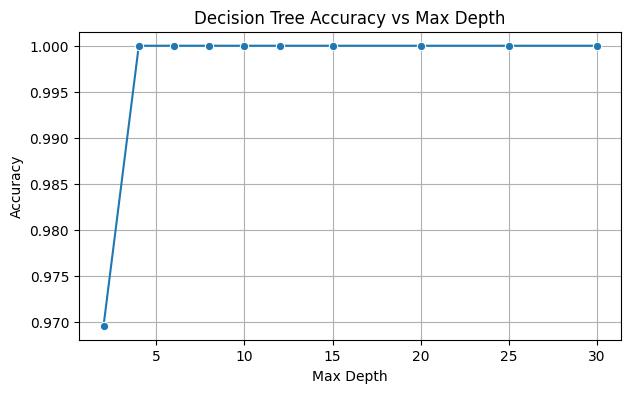


Running Grid Search...
Parameter grid: {'max_depth': [1, 2, 4, 8, 16, 32], 'min_samples_leaf': [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}

Best Parameters:
Max depth: 4
Min samples leaf: 2
Best cross-val accuracy: 1.0

Test-set Confusion Matrix:
[[2231    0]
 [   0 1151]]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


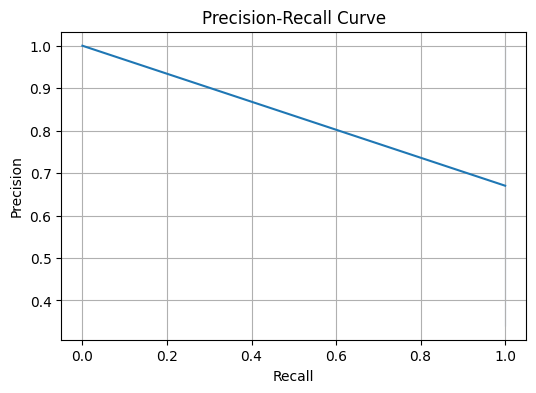


Best CV Accuracy: 1.0


1.0

In [145]:
DT_model(full_dataset)
#DT_model(extracted_features)

Prepare Data <br>
Identify and handling missing data 

One-hot encoding - transform string valued categorical features into numerical boolean values using one-hot encoding 

classification report - part of sklearn metrics library 


## Evaluation of decision tree
#### Confusion Matrix 
#### AUC-ROC curve 

In [146]:
import polars as pl
import glob
import random

data_path = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/*.csv"
test_files = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/unlabeled/*.csv"
files = glob.glob(data_path)

# Sample files if needed
num_samples = 100
file_list = random.sample(files, num_samples)

print(f"Using {len(file_list)} files out of {len(files)}")
all_dfs = []

for f in file_list:
    # Read file via Polars
    df_pl = pl.read_csv(f)

    # Convert Polars → Pandas because your FFT function uses numpy/pandas
    df_pd = df_pl.to_pandas()

    # Run FFT feature extraction
    features = compute_fft_window_energy(df_pd)

    # Add file_id
    features["file_id"] = f.split("/")[-1].replace(".csv", "")

    # Convert back to Polars
    features_pl = pl.from_pandas(features)

    all_dfs.append(features_pl)

full_dataset_pl = pl.concat(all_dfs, how="vertical")
print(full_dataset_pl.shape)
print(full_dataset_pl.head())
full_dataset_pl = full_dataset_pl.with_columns(
    pl.when(pl.col("label_fog") == "FoG").then(1).otherwise(0).alias("label")
)
full_dataset_pl = full_dataset_pl.with_columns([
    (pl.col("low_energy") / pl.col("high_energy")).alias("low_high_ratio")
])
full_dataset = full_dataset_pl.to_pandas()
print(full_dataset.shape)
unique_files = full_dataset["file_id"].unique()

import numpy as np
np.random.seed(42)

train_files = np.random.choice(unique_files, size=int(0.8*len(unique_files)), replace=False)
test_files = [f for f in unique_files if f not in train_files]

train_df = full_dataset[full_dataset["file_id"].isin(train_files)]
test_df = full_dataset[~full_dataset["file_id"].isin(train_files)]

drop_cols = ["label_fog", "file_id"]

X_train = train_df.drop(columns=drop_cols + ["label"], errors="ignore")
y_train = train_df["label"]

X_test  = test_df.drop(columns=drop_cols + ["label"], errors="ignore")
y_test  = test_df["label"]
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=10)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, class_weight="balanced")
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    eval_metric="logloss",
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:,1]

Using 100 files out of 833
(4600, 37)
shape: (5, 37)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ start_tim ┆ end_time ┆ label_fog ┆ low_energ ┆ … ┆ std_magni ┆ min_magni ┆ max_magni ┆ file_id   │
│ e         ┆ ---      ┆ ---       ┆ y         ┆   ┆ tude      ┆ tude      ┆ tude      ┆ ---       │
│ ---       ┆ f64      ┆ str       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ str       │
│ f64       ┆          ┆           ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆           │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0       ┆ 3.0      ┆ NonFoG    ┆ 0.197635  ┆ … ┆ 0.554403  ┆ 8.371451  ┆ 12.417035 ┆ cd0bf2d33 │
│           ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1         │
│ 1.5       ┆ 4.5      ┆ NonFoG    ┆ 0.285338  ┆ … ┆ 0.952469  ┆ 7.30901   ┆ 12.949742 ┆ cd0bf2d33 │
│           ┆          ┆           ┆  

In [147]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(name, y_test, y_pred, y_prob):
    print(f"\n===== {name} =====")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print("AUC      :", roc_auc)
    
    return fpr, tpr, roc_auc


In [148]:
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", lw=2)
    plt.plot([0,1], [0,1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()



===== Decision Tree =====
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       702
           1       1.00      1.00      1.00       131

    accuracy                           1.00       833
   macro avg       1.00      1.00      1.00       833
weighted avg       1.00      1.00      1.00       833

AUC      : 1.0


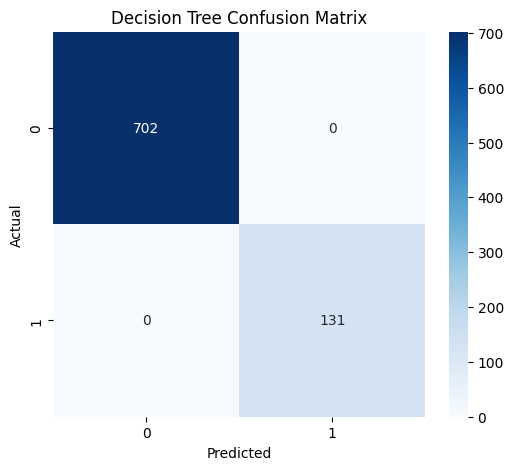

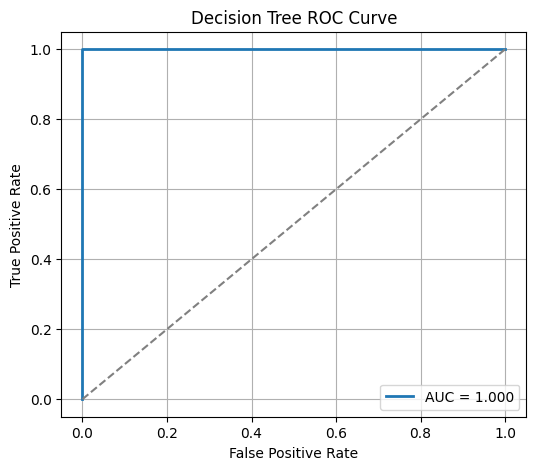


===== Random Forest =====
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       702
           1       1.00      1.00      1.00       131

    accuracy                           1.00       833
   macro avg       1.00      1.00      1.00       833
weighted avg       1.00      1.00      1.00       833

AUC      : 1.0


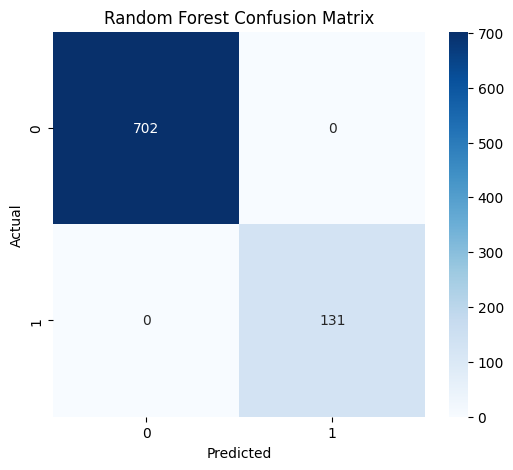

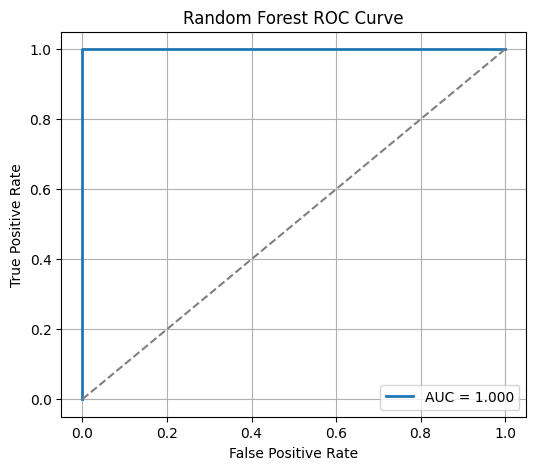


===== XGBoost =====
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       702
           1       1.00      1.00      1.00       131

    accuracy                           1.00       833
   macro avg       1.00      1.00      1.00       833
weighted avg       1.00      1.00      1.00       833

AUC      : 1.0


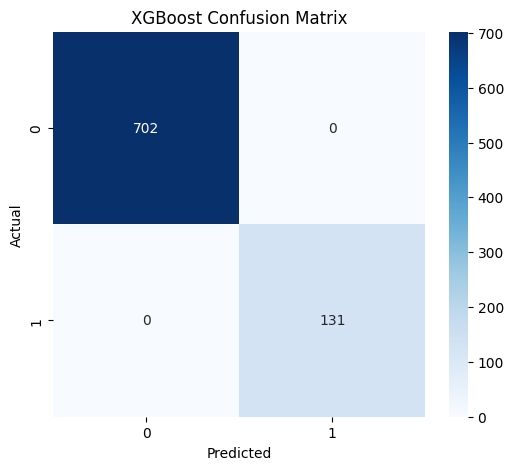

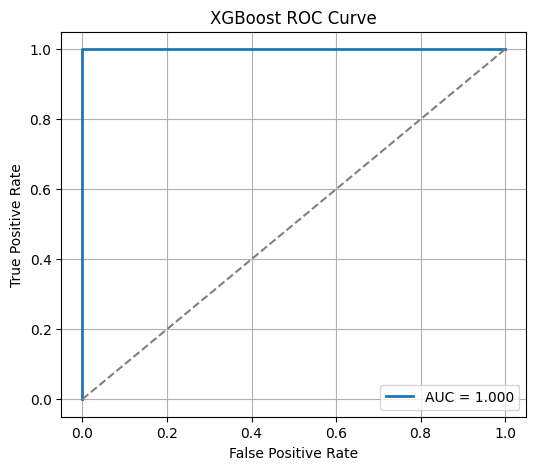

,Model,AUC
0,Decision Tree,1.0
1,Random Forest,1.0
2,XGBoost,1.0


In [149]:
dt_fpr, dt_tpr, dt_auc = evaluate_model(
    "Decision Tree", y_test, dt_pred, dt_pred  # dt has no predict_proba by default
)

plot_confusion_matrix(y_test, dt_pred, "Decision Tree Confusion Matrix")
plot_roc_curve(dt_fpr, dt_tpr, dt_auc, "Decision Tree")
rf_fpr, rf_tpr, rf_auc = evaluate_model(
    "Random Forest", y_test, rf_pred, rf_prob
)

plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")
plot_roc_curve(rf_fpr, rf_tpr, rf_auc, "Random Forest")
xgb_fpr, xgb_tpr, xgb_auc = evaluate_model(
    "XGBoost", y_test, xgb_pred, xgb_prob
)

plot_confusion_matrix(y_test, xgb_pred, "XGBoost Confusion Matrix")
plot_roc_curve(xgb_fpr, xgb_tpr, xgb_auc, "XGBoost")
import pandas as pd

metrics_table = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "AUC": [dt_auc, rf_auc, xgb_auc],
})

metrics_table


# Random forest model

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [151]:
df = full_dataset.copy()

# Get unique file IDs
files = df["file_id"].unique()

# Choose 80% files for training
np.random.seed(42)
train_files = np.random.choice(files, size=int(len(files)*0.8), replace=False)

# Define train and test sets by file
train_df = df[df["file_id"].isin(train_files)]
test_df  = df[~df["file_id"].isin(train_files)]

print("Train rows:", train_df.shape)
print("Test rows:", test_df.shape)


Train rows: (3767, 39)
Test rows: (833, 39)


In [152]:
# Drop non-feature columns (keep energy, timings, etc.)
X = full_dataset.drop(columns=["label", "label_fog", "file_id"])
y = full_dataset["label"]

# Train-test split (stratified so classes stay balanced)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (3680, 36)
Test size: (920, 36)


In [153]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced"      # important for FoG imbalance
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]


In [154]:
xgb_model = xgb.XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

In [155]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n===== {name} =====")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)


===== Random Forest =====
Accuracy : 0.9956521739130435
Precision: 0.9910714285714286
Recall   : 0.9970059880239521
F1 Score : 0.9940298507462687

===== XGBoost =====
Accuracy : 0.9989130434782608
Precision: 0.9970149253731343
Recall   : 1.0
F1 Score : 0.9985052316890882


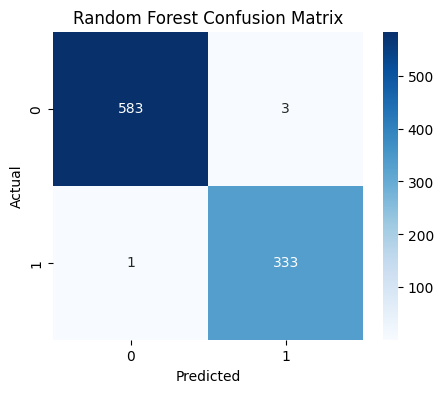

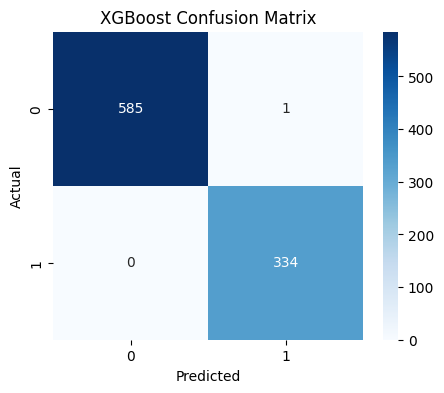

In [156]:
def plot_confusion(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion(y_test, rf_pred, "Random Forest Confusion Matrix")
plot_confusion(y_test, xgb_pred, "XGBoost Confusion Matrix")

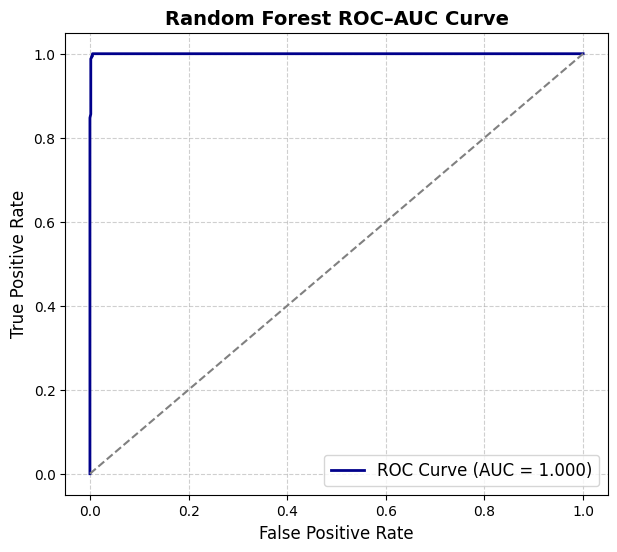

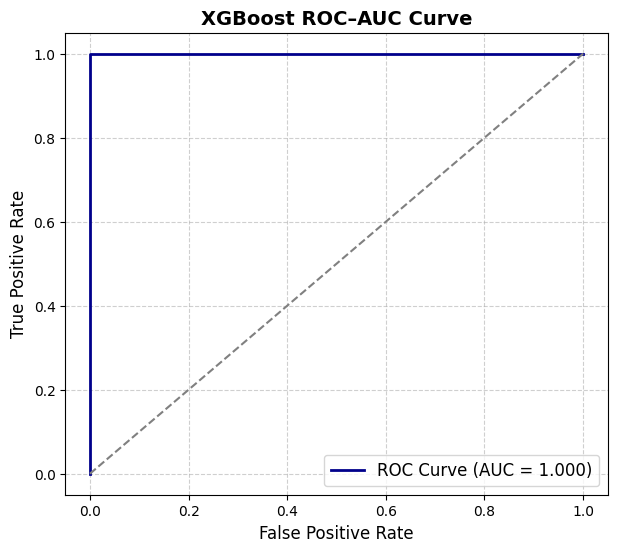

In [157]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_auc(y_test, probs, model_name):
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.figure(figsize=(7,6))
    plt.plot(fpr, tpr, color="darkblue", lw=2,
             label=f"ROC Curve (AUC = {roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", lw=1.5)

    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title(f"{model_name} ROC–AUC Curve", fontsize=14, weight="bold")
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.show()
plot_roc_auc(y_test, rf_prob, "Random Forest")
plot_roc_auc(y_test, xgb_prob, "XGBoost")


### Random forest feature importance

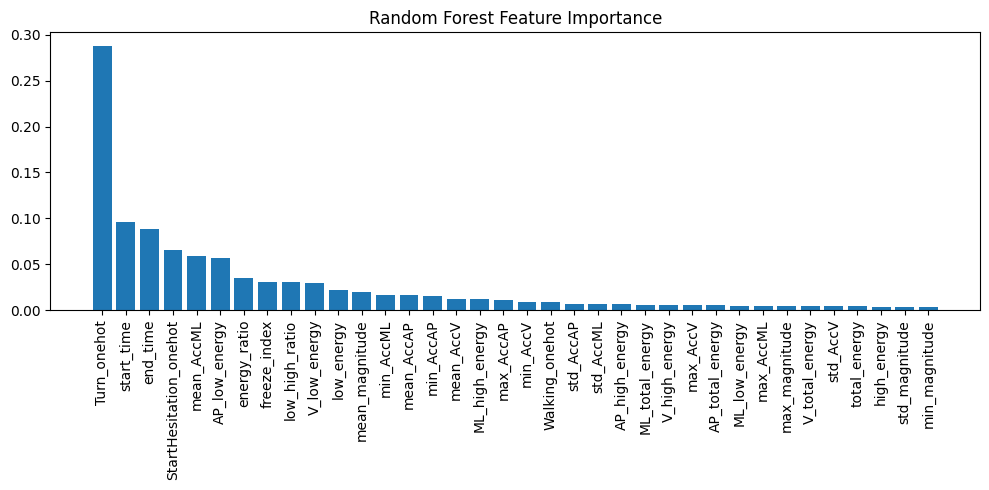

In [158]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Random Forest Feature Importance")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


### XGBoost feature importance 

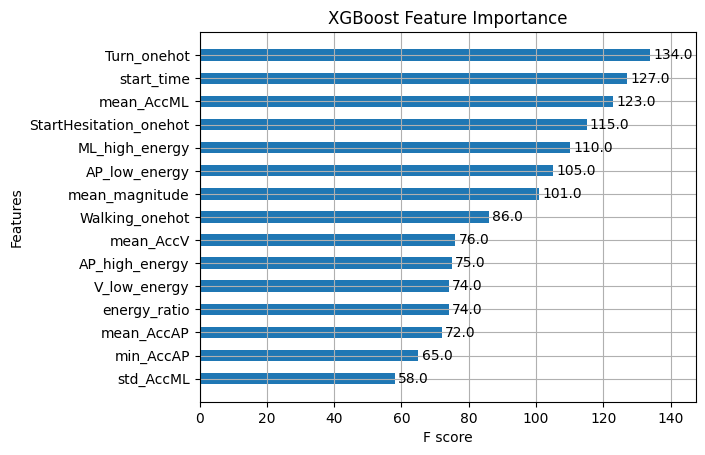

In [159]:
xgb.plot_importance(xgb_model, max_num_features=15, height=0.5)
plt.title("XGBoost Feature Importance")
plt.show()


Final numeric features: (4600, 36)
Decision Tree Performance:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       334

    accuracy                           1.00       920
   macro avg       1.00      1.00      1.00       920
weighted avg       1.00      1.00      1.00       920



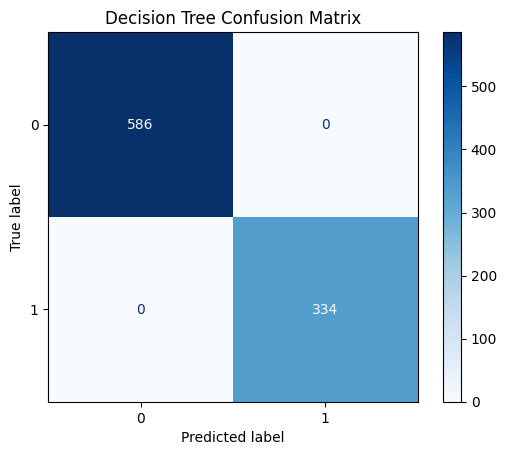

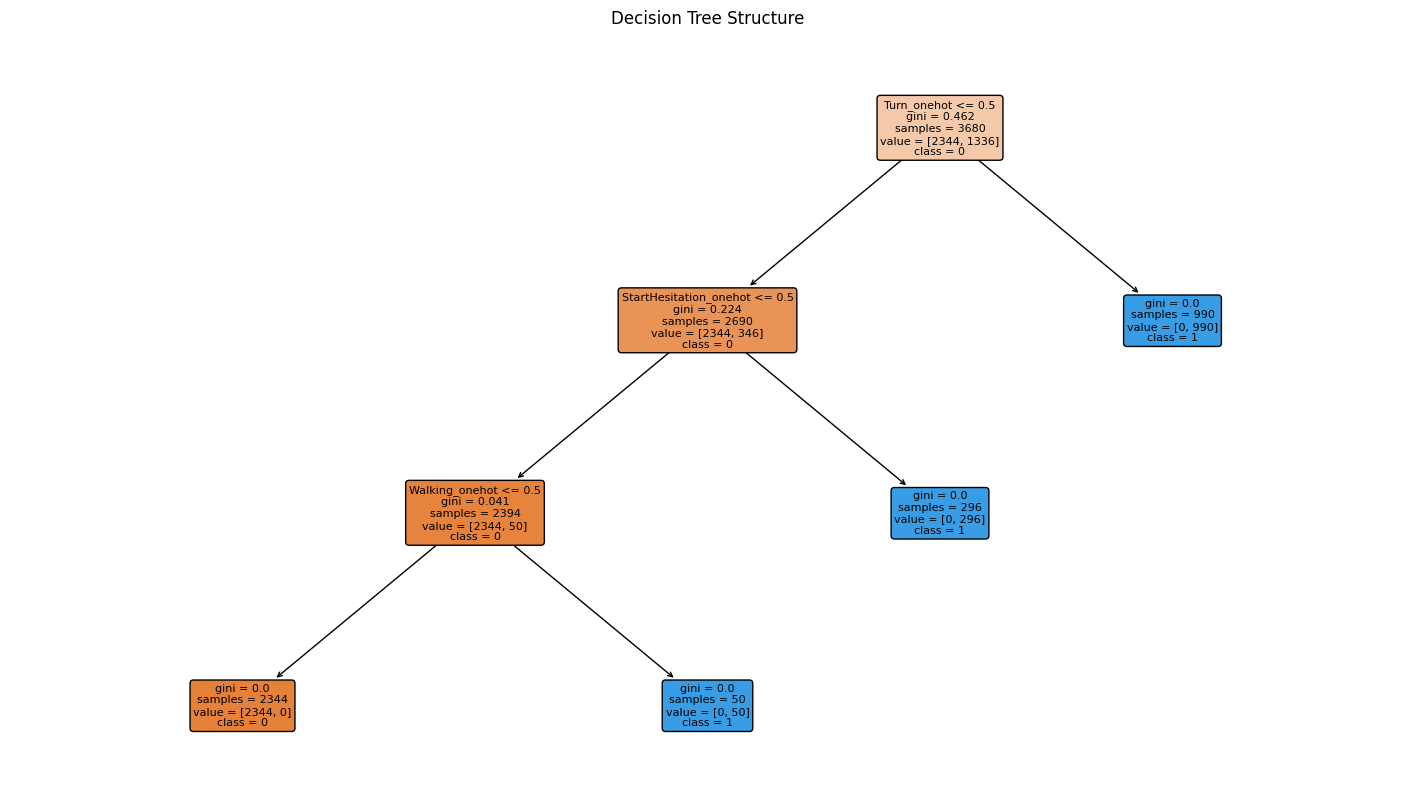

In [160]:
### -----------------------------------------
# Prepare dataset safely
# -----------------------------------------
df = full_dataset.copy()

# Remove known non-numeric columns
df = df.drop(["file_id", "label_fog"], axis=1, errors="ignore")

# Target
y = df["label"]

# Features → Keep only numeric columns
X = df.drop("label", axis=1)
X = X.select_dtypes(include=[np.number])   # ← FIX

print("Final numeric features:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------
# 2. Model Training
# --------------------------
dt = DecisionTreeClassifier(
    criterion="gini",         # or "entropy"
    max_depth=None,           # tune this later
    random_state=42
)
dt.fit(X_train, y_train)

# --------------------------
# 3. Predictions
# --------------------------
y_pred = dt.predict(X_test)

# --------------------------
# 4. Evaluation Metrics
# --------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Decision Tree Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --------------------------
# 5. Confusion Matrix
# --------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# --------------------------
# 6. Visualize the Decision Tree
# --------------------------
plt.figure(figsize=(18, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=[str(c) for c in dt.classes_],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Structure")
plt.show()